# 스타 이미지 크롤링
- 수집 대상: 인기 남자 아이돌 100명, 여자 아이돌 100명, 일반 스타 10명
- [인기 스타 리스트](https://docs.google.com/spreadsheets/d/13ni1cFJ_IeJZuY2Fb2H6pioZMOPeCSEjV40H0a-bEos/edit?usp=drive_link)


In [ ]:
pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 29.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.2/460.2 kB 26.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
'''
* 네이버 이미지 가져오기 (24.02.19)
'''

import os
from selenium import webdriver
from selenium.webdriver.common.by import By

import urllib
import time, datetime

item_list = ["하이키 옐", "우아 우연", "프로미스나인 박지원", "프로미스나인 노지선", "러블리즈 유지애", "다이아 정채연", "프로미스나인 이새롬", "에프엑스 루나", "프로미스나인 송하영", "프로미스나인 이서연", "클라씨 보은", "스테이씨 시은", "위키미키 최유정", "손흥민", "임영웅", "아이유", "신혜선", "김유정", "송강", "유재석", "이찬원", "한소희", "정우성"]
FOLDER = 'naver' # 2번
# IMG_XPATH = '//*[@id="main_pack"]/section[2]/div/div[2]/div/div/div[1]/div[1]/div/div/div[1]/div[1]/img' # 3번
IMG_XPATH = '//*[@id="main_pack"]/section[1]/div/div/div[1]/div[2]/div[1]/img' # 3번

def main():
  start = check_start() # 시간 측정 시작
  driver = webdriver.Chrome()
  for searchItem in item_list:
    saveDir = makeFolder(searchItem)

    url = makeUrl(searchItem)# 검색할 url 가져와서
    driver.get(url)# 이미지 검색으로 가서
    maximizeWindow(driver)# 창최대화
    scrollToEnd(driver)

    forbiddenCount = saveImgs(driver, saveDir, start)# 모든 상세 이미지 src들을 가져온다
    sec = check_time(start)
    print(f'실패수{str(forbiddenCount)}, {sec}, {datetime.datetime.now().time()}')
  time.sleep(10)
  driver.quit()

# 이미지 검색 url 만들기
def makeUrl(searchItem):
  url = 'https://search.naver.com/search.naver'
  params ={
    'where' : 'image',
    'sm'    : 'tab_jum',
    'query' : searchItem
  }
  url = url + '?' + urllib.parse.urlencode(params)
  return url


# 폴더 생성
def makeFolder(searchItem):
  saveDir = os.path.join(os.getcwd(), 'data', f'{FOLDER}_{searchItem}')
  try:
    if not(os.path.isdir(saveDir)): # 해당 폴더가 없다면
      os.makedirs(os.path.join(saveDir)) # 만들어라
    return saveDir
  except OSError as e:
    print(e+'폴더 생성 실패')

# 창 최대화
def maximizeWindow(driver):
  driver.maximize_window()

# 모든 이미지 목록을 가져오기 위해 무한 스크롤 다운
def scrollToEnd(driver):
  prev_height = driver.execute_script('return document.body.scrollHeight')
  print(f'prev_height: {prev_height}')

  while True:
    time.sleep(1) #네이버는 sleep없이 이동할 경우 무한로딩에 걸린다.
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
    time.sleep(3)

    cur_height = driver.execute_script('return document.body.scrollHeight')
    print(f'cur_height: {cur_height}')
    if cur_height == prev_height:
      print('높이가 같아짐')
      break
    prev_height = cur_height
  # 페이지를 모두 로딩한 후에는 최상단으로 다시 올라가기
  driver.execute_script('window.scrollTo(0, 0)')

# 모든 이미지들을 저장한다
def saveImgs(driver, saveDir, start):
  time.sleep(1)
  forbiddenCount = 0
  # imgs = driver.find_elements(By.CSS_SELECTOR, '._image._listImage')
  imgs = driver.find_elements(By.CSS_SELECTOR, '._fe_image_tab_content_thumbnail_image')
  srcList = []
  img_count = len(imgs)
  print(f'전체 이미지수 : {img_count}')
  # 하나씩 클릭해가며 저장
  for imgNum, img in enumerate(imgs): # imgNum에 이미지번호가 0부터 들어간다
    try:
      img.click()
      time.sleep(3)

      # 아래의 xPath는 자주 바뀌는 것 같다. 나머지는 고정인거 같으니 이것만 가끔 확인해주자
      bigImg = driver.find_element(By.XPATH, IMG_XPATH)
      src = bigImg.get_attribute('src')
      urllib.request.urlretrieve(src, saveDir + '/' + str(imgNum) + '.jpg')
      sec = check_time(start)
      print(f'{imgNum+1}/{img_count} saved {sec}')

    except Exception as e:
      print(e)
      forbiddenCount += 1# 저장 실패한 개수. forbidden이나 파일에러도 꽤 많다
      continue
  return forbiddenCount


# 시간 측정
def check_start():
    start_time = time.time()
    print("Start! now.." + str(start_time))
    return start_time
def check_time(start):
    end = time.time()
    during = end - start
    sec = str(datetime.timedelta(seconds=during)).split('.')[0]
    return sec
main()

Start! now..1708928719.2625039
prev_height: 3678
cur_height: 6849
cur_height: 9711
cur_height: 12805
cur_height: 15928
cur_height: 18908
cur_height: 21793
cur_height: 24803
cur_height: 27809
cur_height: 30734
cur_height: 30734
높이가 같아짐
전체 이미지수 : 500
1/500 saved 0:00:47
2/500 saved 0:00:51
3/500 saved 0:00:54
4/500 saved 0:00:57
5/500 saved 0:01:00
6/500 saved 0:01:03
7/500 saved 0:01:06
8/500 saved 0:01:09
9/500 saved 0:01:12
10/500 saved 0:01:16
11/500 saved 0:01:19
12/500 saved 0:01:22
13/500 saved 0:01:25
14/500 saved 0:01:29
15/500 saved 0:01:32
16/500 saved 0:01:35
17/500 saved 0:01:38
18/500 saved 0:01:41
19/500 saved 0:01:45
20/500 saved 0:01:48
21/500 saved 0:01:51
22/500 saved 0:01:54
23/500 saved 0:01:57
24/500 saved 0:02:00
25/500 saved 0:02:04
26/500 saved 0:02:07
27/500 saved 0:02:10
28/500 saved 0:02:13
29/500 saved 0:02:16
30/500 saved 0:02:19
31/500 saved 0:02:23
32/500 saved 0:02:26
33/500 saved 0:02:29
34/500 saved 0:02:32
35/500 saved 0:02:35
36/500 saved 0:02:38
37/5

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=122.0.6261.69)
Stacktrace:
0   chromedriver                        0x0000000104688580 chromedriver + 3966336
1   chromedriver                        0x0000000104680b0c chromedriver + 3934988
2   chromedriver                        0x0000000104303da0 chromedriver + 277920
3   chromedriver                        0x00000001042ecc74 chromedriver + 183412
4   chromedriver                        0x00000001042ecba0 chromedriver + 183200
5   chromedriver                        0x000000010437e320 chromedriver + 779040
6   chromedriver                        0x000000010433afb0 chromedriver + 503728
7   chromedriver                        0x000000010433ba28 chromedriver + 506408
8   chromedriver                        0x000000010464d768 chromedriver + 3725160
9   chromedriver                        0x0000000104651c5c chromedriver + 3742812
10  chromedriver                        0x0000000104636250 chromedriver + 3629648
11  chromedriver                        0x0000000104652758 chromedriver + 3745624
12  chromedriver                        0x00000001046295c8 chromedriver + 3577288
13  chromedriver                        0x0000000104670fb8 chromedriver + 3870648
14  chromedriver                        0x000000010467115c chromedriver + 3871068
15  chromedriver                        0x000000010468077c chromedriver + 3934076
16  libsystem_pthread.dylib             0x000000018376e034 _pthread_start + 136
17  libsystem_pthread.dylib             0x0000000183768e3c thread_start + 8


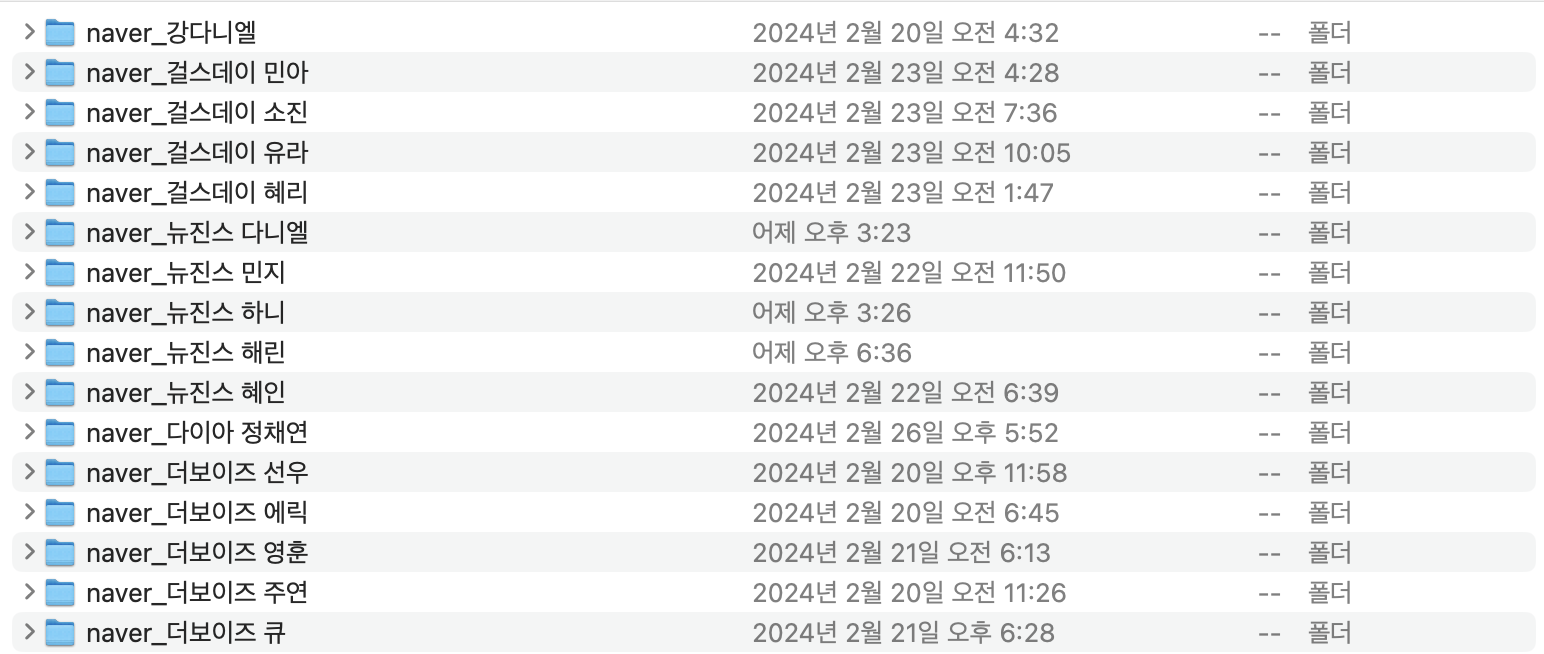

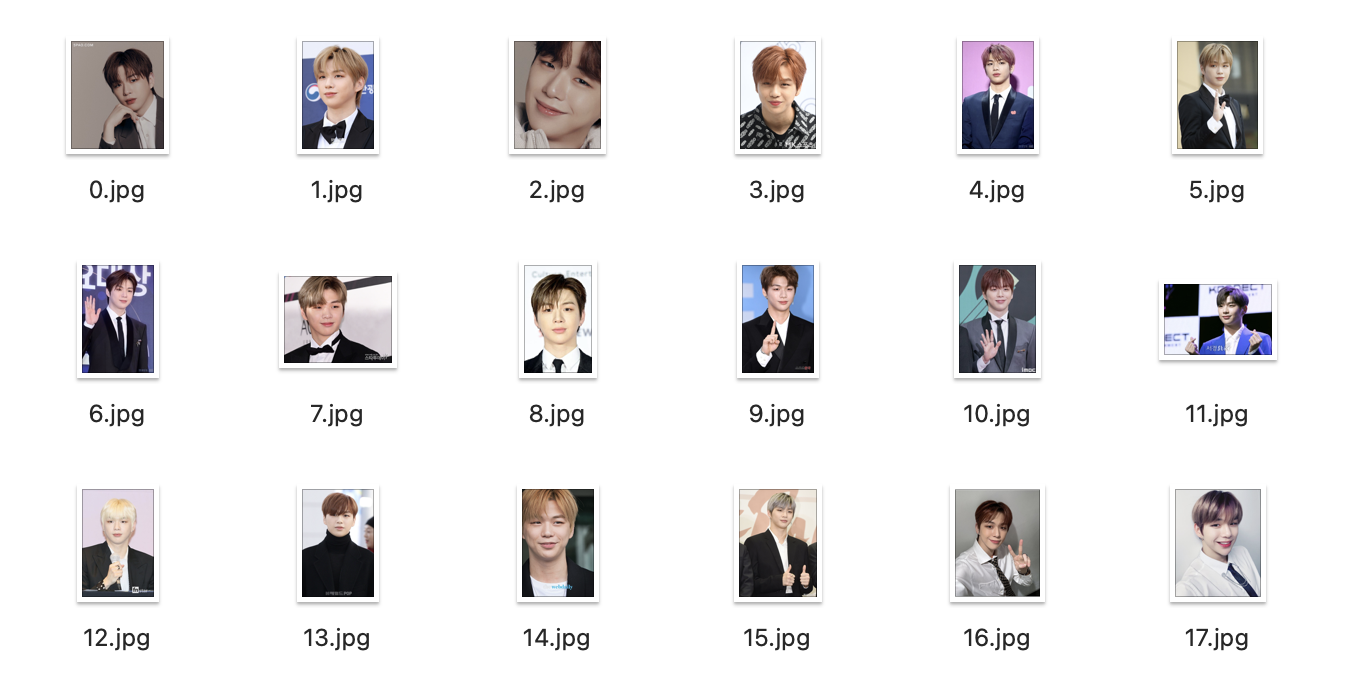